<a href="https://colab.research.google.com/github/AbdulHikmat/PERSONAL-PROJECT/blob/main/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutionary Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.image as img

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train[0]

5

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

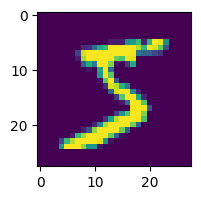

In [ ]:
plt.figure(figsize = (13, 2))
plt.imshow(X_train[0])

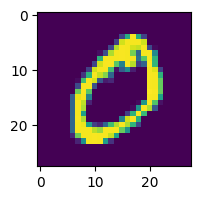

In [ ]:
plt.figure(figsize = (13, 2))
plt.imshow(X_train[1])

### Normalisation (Scaling the input values)

The normalization that'll be used now is a form of Min-Max scaling, which is a common method to scale input values to a specific range. Specifically, it scales the pixel values from the original range of [0, 255] to the normalized range of [0, 1].
To normalize the data, each pixel values has to be divided by 255, for each of the channels(R, G and B)

In [ ]:
X_train = X_train / 255
X_test = X_test /255

## CNN

In [ ]:
cnn = tf.keras.Sequential([
   # cnn
   layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)),
   layers.MaxPooling2D((2, 2)),

   layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
   layers.MaxPooling2D((2, 2)),

   # dense
   layers.Flatten(),
   layers.Dense(64, activation='relu'),
   layers.Dense(10, activation='softmax')
])

### Optimizer

The optimizer is a crucial component in training Convolutional Neural Networks (CNNs) and other deep learning models. The optimizer is responsible for adjusting the model's weights during training in order to minimize the loss function.

Adam optimization algorithm is used here. It is an adaptive learning rate optimization algorithm. It combines the advantages of both Adagrad and RMSprop. It adjusts the learning rates for each parameter individually, allowing for dynamic adaptation during training.

In [ ]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Train the model
history = cnn.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1726 - accuracy: 0.9472 - val_loss: 0.0669 - val_accuracy: 0.9821
Epoch 2/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0535 - val_accuracy: 0.9838
Epoch 3/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0452 - val_accuracy: 0.9869
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0413 - val_accuracy: 0.9887
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0419 - val_accuracy: 0.9885
Epoch 7/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0477 -

### Assessing Overfitting
This is done by annalyzing the trainig and validationmetric

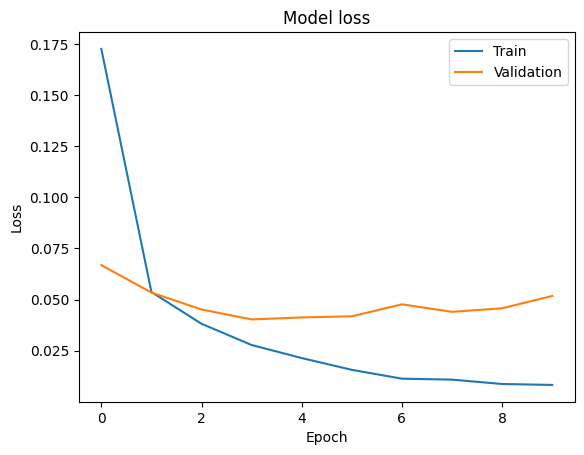

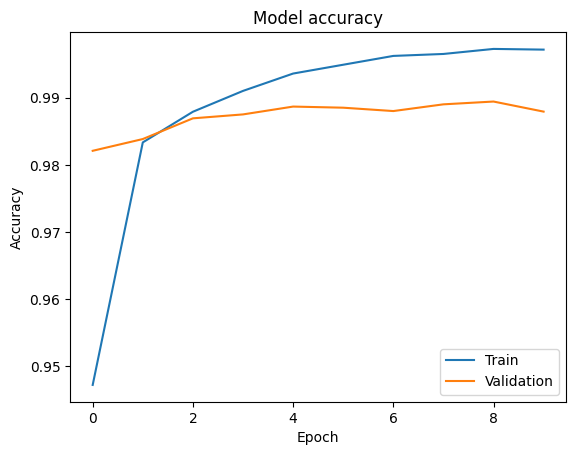

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### To reduce overfitting in a Convolutional Neural Network trained model, the following procedure will be carried out


The graphical reptresentation above shows that the model is overfitting.

 Overfitting occurs if the training loss continues to decrease, but the validation loss starts to increase or plateau, and the training accuracy significantly outpaces the validation accuracy, it suggests overfitting

1. Data Augmentation:

Generate additional training examples by applying random transformations to the existing data, such as rotation, zooming, and horizontal flipping. This helps the model generalize better to unseen variations of the input data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, horizontal_flip=True)

2. Dropout:

Introduce dropout layers in the model to randomly deactivate a fraction of neurons during training. This helps prevent the model from relying too heavily on specific neurons, promoting more robust learning.

In [ ]:
from tensorflow.keras.layers import Dropout


cnn.add(Dropout(0.25))  # 25% of neurons will be deactivated during training

3. Weight Regularization:

Apply L1 or L2 regularization to the model's weights. This adds a penalty term to the loss function based on the magnitude of the weights, discouraging overly complex models.

In [ ]:
 from tensorflow.keras import regularizers

 layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1),  kernel_regularizer=regularizers.l2(0.01))

Checking for overfitting again

In [ ]:
# retrain the model
history = cnn.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0070 - accuracy: 0.9974 - val_loss: 0.0516 - val_accuracy: 0.9890
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0544 - val_accuracy: 0.9883
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0484 - val_accuracy: 0.9898
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0476 - val_accuracy: 0.9904
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0559 - val_accuracy: 0.9904
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0541 - val_accuracy: 0.9899
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0560 -

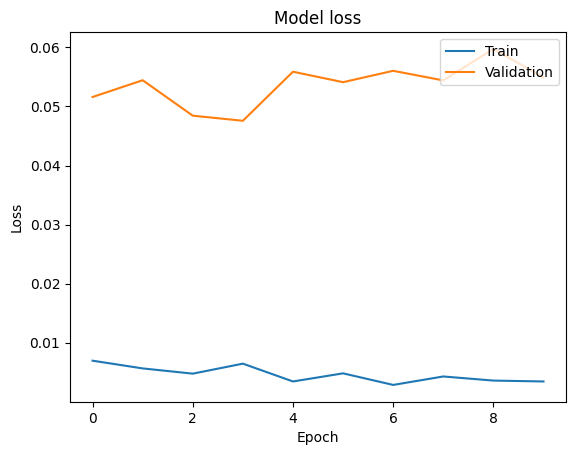

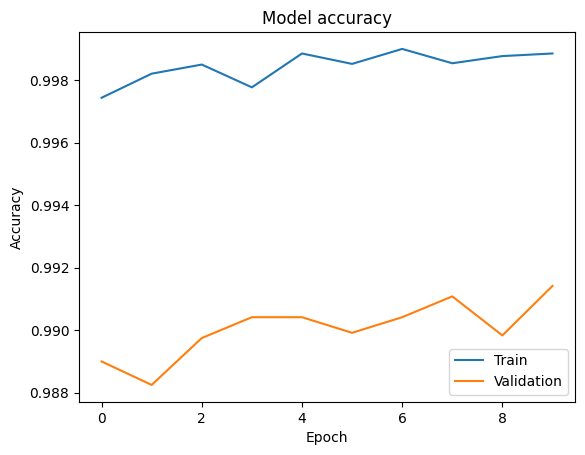

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The above graphical representation shows that the model is not overfitting

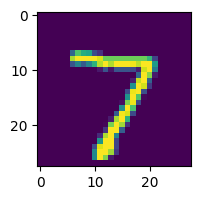

In [ ]:

plt.figure(figsize = (13, 2))
plt.imshow(X_test[0])

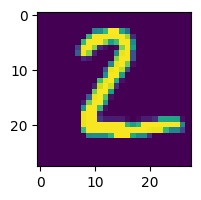

In [ ]:
plt.figure(figsize = (13, 2))
plt.imshow(X_test[1])